In [204]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   #Import the relevant model
from sklearn import metrics

df = pd.read_csv("csv/images_analyzed_productivity1.csv")

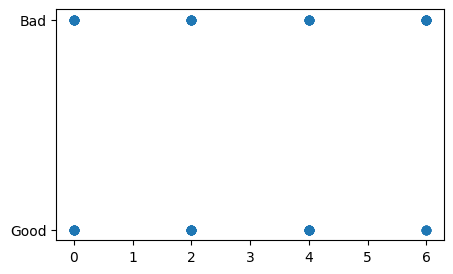

In [205]:
#STEP 1: DATA READING AND UNDERSTANDING
plt.figure(figsize=(5, 3))
plt.scatter(df.Coffee, df.Productivity)


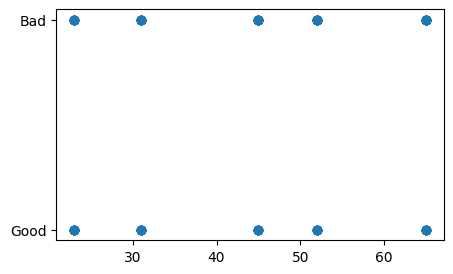

In [206]:
plt.figure(figsize=(5, 3))
plt.scatter(df.Age, df.Productivity)

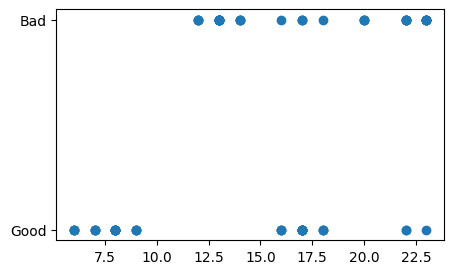

In [207]:
plt.figure(figsize=(5, 3))
plt.scatter(df.Time, df.Productivity)

([<matplotlib.patches.Wedge at 0x25b2871c2d0>,
 [Text(-0.08630495758716046, 1.0966090708615712, ''),
  Text(0.08630505345577368, -1.0966090633165477, '')],
 [Text(-0.047075431411178426, 0.5981504022881298, '52.5%'),
  Text(0.04707548370314927, -0.5981503981726624, '47.5%')])

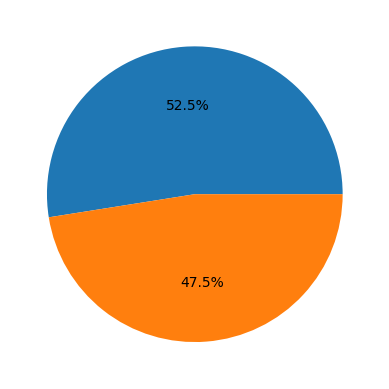

In [208]:
# PLot productivity values to see the split between Good and Bad

sizes = df['Productivity'].value_counts()
plt.pie(sizes, autopct='%1.1f%%')

In [209]:
#STEP 2: DROP IRRELEVANT DATA
df.drop(['Images_Analyzed', 'User'], axis=1, inplace=True)
df.dropna()

df1 = df.copy()

In [210]:
#STEP 4: Convert non-numeric to numeric, if needed.
#Sometimes we may have non-numeric data, for example batch name, user name, city name, etc.
#e.g. if data is in the form of YES and NO then convert to 1 and 0

df.loc[df['Productivity'] == 'Good', 'Productivity'] = 1
df.loc[df['Productivity'] == 'Bad', 'Productivity'] = 0
df.head()

,Time,Coffee,Age,Productivity
0,8,0,23,1
1,13,0,23,0
2,17,0,23,1
3,22,0,23,0
4,8,2,23,1


In [211]:
#STEP 5: PREPARE THE DATA.
#Y is the data with dependent variable, this is the Productivity column
Y = df['Productivity'].values
Y = Y.astype('int')

#X is data with independent variables, everything except Productivity column
X = df[['Time', 'Coffee', 'Age']]

In [212]:
#STEP 6: SPLIT THE DATA into TRAIN AND TEST data.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=20)

In [213]:
#STEP 7: Defining the model and training.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [214]:
#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE

prediction_test = model.predict(x_test)

from sklearn import metrics
#Print the prediction accuracy
accuracy = metrics.accuracy_score(y_test, prediction_test)
accuracy

0.6875

In [215]:
print(y_test)
print(prediction_test)

[0 1 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 0 1 0 1]
[0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1]


In [217]:
#UNDERSTAND WHICH VARIABLES HAVE MOST INFLUENCE ON THE OUTCOME
# To get the weights of all the variables

print(model.coef_) #Print the coefficients for each independent variable. 
#But it is not clear which one corresponds to what.
#SO let us print both column values and coefficients. 
#.Series is a 1-D labeled array capable of holding any data type. 
#Default index would be 0,1,2,3... but let us overwrite them with column names for X (independent variables)
weights = pd.Series(model.coef_[0]*-1, index=X.columns.values)

print("Weights for each variables is a follows...")
print(weights)

[[-0.16579388 -0.33150734 -0.02200031]]
Weights for each variables is a follows...
Time      0.165794
Coffee    0.331507
Age       0.022000
dtype: float64
